# Megacam transmission as well as air transparency

## Data taken from

- http://supernovae.in2p3.fr/snls_sdss/


## other info on filters
- http://www.cfht.hawaii.edu/Instruments/Imaging/Megacam/specsinformation.html

In [77]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display
from PIL import Image
from scipy.interpolate import interp1d

In [78]:
#func=interp1d(obsband.wave,obsband.flux,kind='cubic')
#flux=func(WL)              # flux in each bin in array WL

In [79]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [80]:
WLMIN=3000. # Minimum wavelength : PySynPhot works with Angstrom
WLMAX=11000. # Minimum wavelength : PySynPhot works with Angstrom

NBINS=7690 # Number of bins between WLMIN and WLMAX
BinWidth=(WLMAX-WLMIN)/float(NBINS) # Bin width in Angstrom
WL=np.linspace(WLMIN,WLMAX,NBINS)   # Array of wavelength in Angstrom

In [81]:
WLMAX-WLMIN

8000.0

In [82]:
OLD_PLOTS=False

#### Fuction to insert a row
https://stackoverflow.com/questions/24284342/insert-a-row-to-pandas-dataframe


df = insert_row(2, df, df_new)

where 2 is the index position in df where you want to insert df_new.

In [83]:
def insert_row(idx, df, df_insert):
    return df.iloc[:idx, ].append(df_insert).append(df.iloc[idx:, ]).reset_index(drop = True)

In [84]:
def insert_boundary(df,tagname,value=0):
    dfnew=insert_row(value,df,pd.DataFrame({'lambda':[WLMIN],tagname:[value]}))
    dfnew=insert_row(len(dfnew),dfnew,pd.DataFrame({'lambda':[WLMAX],tagname:[value]}))
    return dfnew

# Transmission des filtres

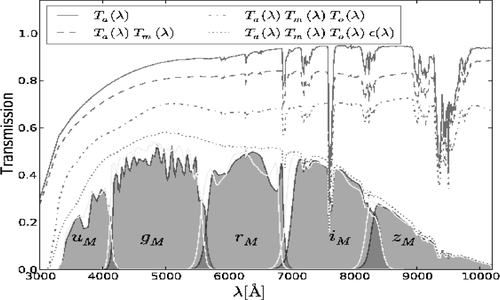

In [85]:
img=Image.open("Figures/every_transmission.png")
img = img.resize((500, 300),Image.ANTIALIAS)
display(img)

In [86]:
files = ['CFHT_MegaPrime_Transmission.dat', \
         'CFHT_Primary_Transmission.dat', \
         'QE_camera_high_res_model.dat', \
         'SNIFS_extinction_buton2012_with_tl_X1_25.dat']

In [87]:
tag_u=["u0","u1","u2","u3","u4","u5","u6","u7","u8","u9"]
tag_g=["g0","g1","g2","g3","g4","g5","g6","g7","g8","g9"]
tag_r=["r0","r1","r2","r3","r4","r5","r6","r7","r8","r9"]
tag_i=["i0","i1","i2","i3","i4","i5","i6","i7","i8","i9"]
tag_z=["z0","z1","z2","z3","z4","z5","z6","z7","z8","z9"]

In [88]:
file_u =["u0.list","u1.list","u2.list","u3.list","u4.list","u5.list","u6.list","u7.list","u8.list","u9.list"]
file_g =["g0.list","g1.list","g2.list","g3.list","g4.list","g5.list","g6.list","g7.list","g8.list","g9.list"]
file_r =["r0.list","r1.list","r2.list","r3.list","r4.list","r5.list","r6.list","r7.list","r8.list","r9.list"]
file_i =["i0.list","i1.list","i2.list","i3.list","i4.list","i5.list","i6.list","i7.list","i8.list","i9.list"]
file_z =["z0.list","z1.list","z2.list","z3.list","z4.list","z5.list","z6.list","z7.list","z8.list","z9.list"]
file_y =["y0.list","y1.list","y2.list","y3.list","y4.list","y5.list","y6.list","y7.list","y8.list","y9.list"]

In [89]:
path_transmissions="all_products_v3_2/MegaCam_v3.2/"

In [90]:
def Read_all_filter_files(all_files,all_tag):
    all_df=[]
    index=0
    for file in all_files:
        df=pd.read_table(os.path.join(path_transmissions,file),sep=' ' ,skiprows=4,names=["lambda",all_tag[index]],index_col=False)
        df=insert_row(0,df,pd.DataFrame({'lambda':[WLMIN],all_tag[index]:[0.]}))
        df=insert_row(len(df),df,pd.DataFrame({'lambda':[WLMAX],all_tag[index]:[0.]}))
        all_df.append(df) 
        index+=1
        
    return all_df

In [91]:
def Interpolate(all_df,all_tag):
    
    all_filt_arr=[]
    index=0
    for df in all_df:
        func=interp1d(df["lambda"],df[all_tag[index]],kind='linear')
        sf=func(WL)
        all_filt_arr.append(sf)
        index+=1
    return all_filt_arr

## CFHT_MegaPrime_Transmission

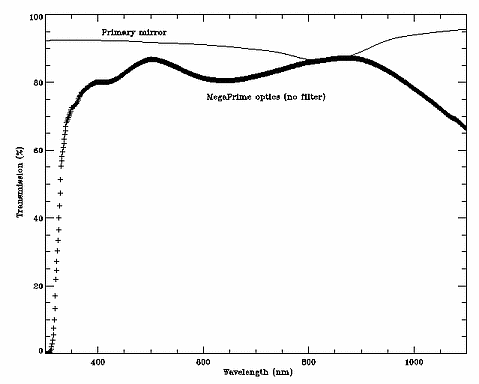

In [92]:
display(Image.open("Figures/MegaPrime-Optics-Transmission-75p.gif")) 

In [93]:
display("Figures/filters_transmissions.png")

'Figures/filters_transmissions.png'

In [94]:
df1=pd.read_table(os.path.join(path_transmissions,files[0]),sep=' ',names=["lambda","transm"],index_col=False)

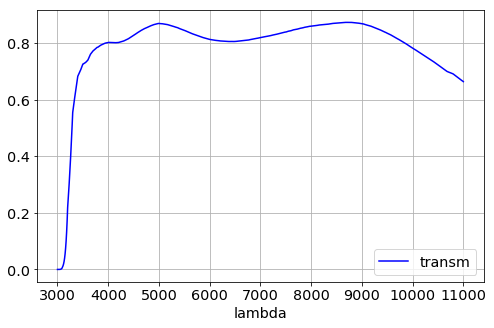

In [95]:
df1.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True)

In [96]:
func1=interp1d(df1["lambda"],df1["transm"],kind='linear')
throughput=func1(WL)

## CFHT_Primary_Transmission

In [97]:
df2=pd.read_table(os.path.join(path_transmissions,files[1]),sep=' ',names=["lambda","transm"],index_col=False)

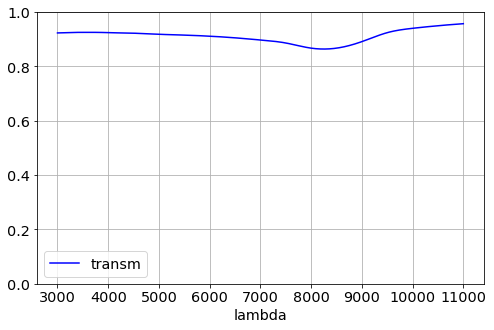

In [98]:
df2.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True,ylim=(0,1))

In [99]:
func2=interp1d(df2["lambda"],df2["transm"],kind='linear')
prim_mirror=func2(WL)

## QE_camera_high_res_model.dat

In [100]:
df3=pd.read_table(os.path.join(path_transmissions,files[2]),sep=' ',names=["lambda","transm"],index_col=False)

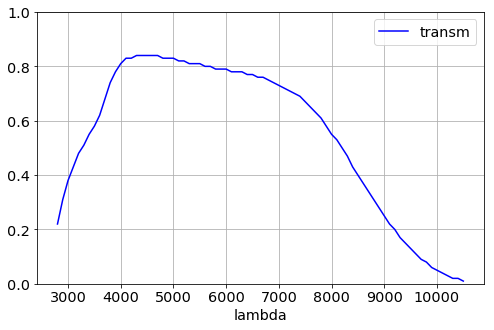

In [101]:
df3.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True,ylim=(0,1))

In [102]:
df3=insert_row(len(df3),df3,pd.DataFrame({'lambda':[WLMAX],"transm":[0]}))

In [103]:
func3=interp1d(df3["lambda"],df3["transm"],kind='linear')
quantum_eff=func3(WL)

## SNIFS_extinction_buton2012_with_tl_X1_25.dat

In [104]:
df4=pd.read_table(os.path.join(path_transmissions,files[3]),sep=' ',names=["lambda","transm"],index_col=False)

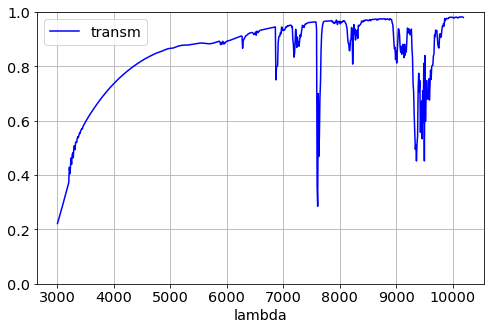

In [105]:
df4.plot(x="lambda",y="transm",color='b',figsize=(8,5),grid=True,ylim=(0,1))

In [106]:
df4=insert_row(len(df4),df4,pd.DataFrame({'lambda':[WLMAX],"transm":[1.]}))

In [107]:
func4=interp1d(df4["lambda"],df4["transm"],kind='linear')
atmosphere=func4(WL)

# Filters 

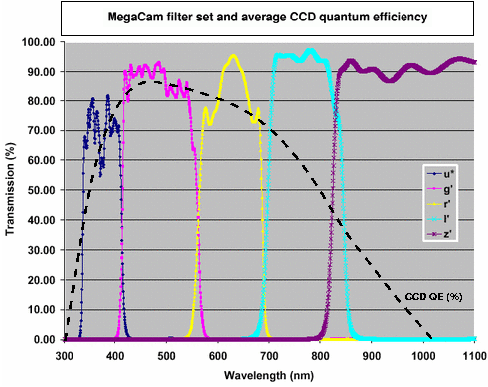

In [108]:
display(Image.open("Figures/MegaCamFilters+QE.gif")  )

## U filters

### Read files with pandas

In [109]:
all_dfu=Read_all_filter_files(file_u,tag_u)

### Interpolate filter transmission with the same wavelength grid

In [110]:
all_sf=Interpolate(all_dfu,tag_u)

In [111]:
dfu=pd.DataFrame(index=WL)
dfu.index.name="$\lambda$"

In [112]:
for idx in np.arange(10):
    dfu[tag_u[idx]]=all_sf[idx]

### Compute the average over the 9 filters

In [113]:
dfu_av=dfu

In [114]:
dfu_av["avu"]=dfu_av.mean(axis=1)

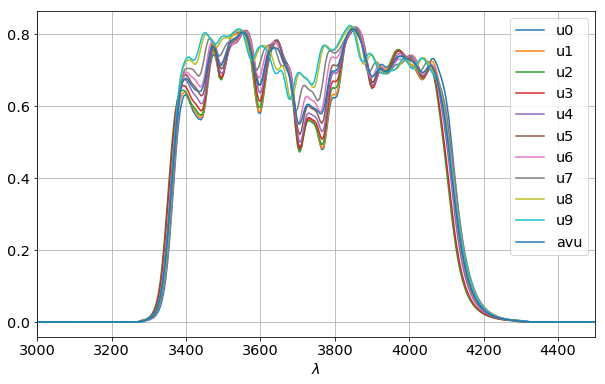

In [115]:
dfu_av.plot(xlim=(3000,4500),grid=True)

## G filters

### Read with pandas

In [116]:
all_dfg=Read_all_filter_files(file_g,tag_g)

### Interpolate 

In [117]:
all_sf=Interpolate(all_dfg,tag_g)

In [118]:
dfg=pd.DataFrame(index=WL)
dfg.index.name="$\lambda$"

In [119]:
for idx in np.arange(10):
    dfg[tag_g[idx]]=all_sf[idx]

### Compute the average over the 9 filters

In [120]:
dfg_av=dfg

In [121]:
dfg_av["avg"]=dfg_av.mean(axis=1)

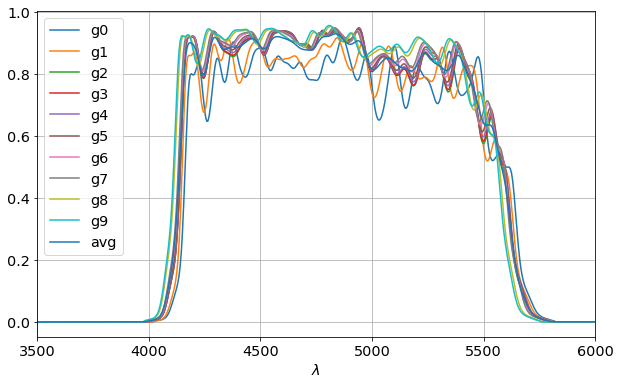

In [122]:
dfg_av.plot(xlim=(3500,6000),grid=True)

## R filters

### Read with pandas

In [123]:
all_dfr=Read_all_filter_files(file_r,tag_r)

### Interpolate

In [124]:
all_sf=Interpolate(all_dfr,tag_r)

In [125]:
dfr=pd.DataFrame(index=WL)
dfr.index.name="$\lambda$"

In [126]:
for idx in np.arange(10):
    dfr[tag_r[idx]]=all_sf[idx]

### Compute average

In [127]:
dfr_av=dfr

In [128]:
dfr_av["avr"]=dfr_av.mean(axis=1)

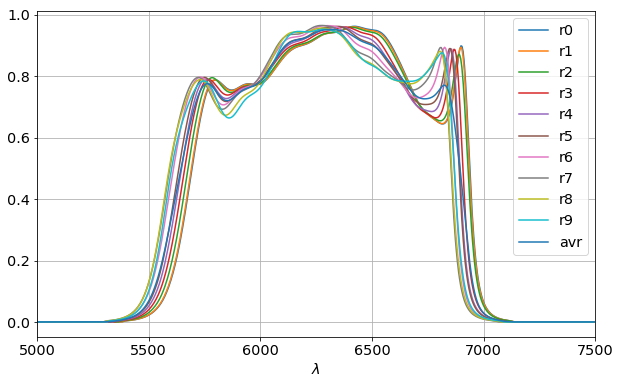

In [129]:
dfr_av.plot(xlim=(5000,7500),grid=True)

## Filter I

## Read filter with pandas

In [130]:
all_dfi=Read_all_filter_files(file_i,tag_i)

## Interpolate

In [131]:
all_sf=Interpolate(all_dfi,tag_i)

In [132]:
dfi=pd.DataFrame(index=WL)
dfi.index.name="$\lambda$"

In [133]:
for idx in np.arange(10):
    dfi[tag_i[idx]]=all_sf[idx]

## Compute average

In [134]:
dfi_av=dfi

In [135]:
dfi_av["avi"]=dfi_av.mean(axis=1)

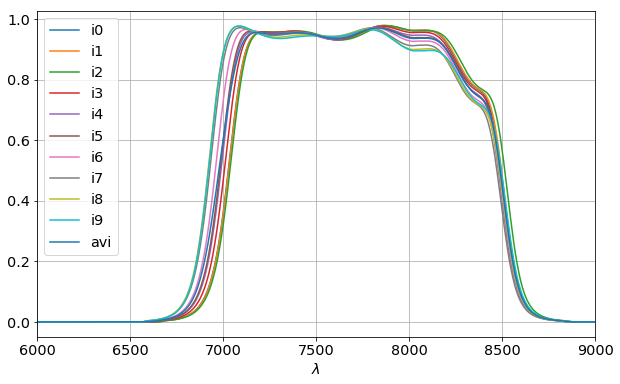

In [136]:
dfi_av.plot(xlim=(6000,9000),grid=True)

## Filter z

### Read filter with pandas

In [137]:
all_dfz=Read_all_filter_files(file_z,tag_z)

### Interpolate

In [138]:
all_sf=Interpolate(all_dfz,tag_z)

In [139]:
dfz=pd.DataFrame(index=WL)
dfz.index.name="$\lambda$"

In [140]:
for idx in np.arange(10):
    dfz[tag_z[idx]]=all_sf[idx]

### Compute average

In [141]:
dfz_av=dfz

In [142]:
dfz_av["avz"]=dfz_av.mean(axis=1)

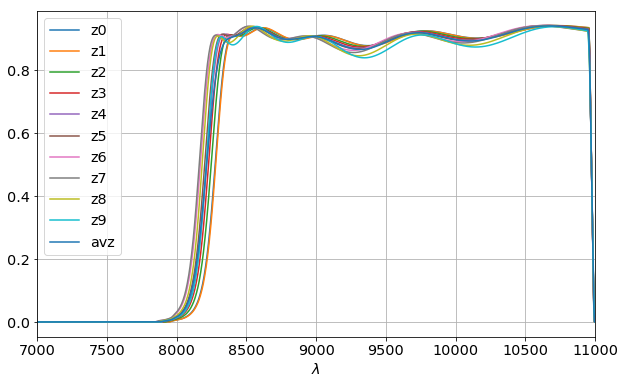

In [143]:
dfz_av.plot(xlim=(7000,WLMAX),grid=True)

## Final transmission

In [144]:
df=pd.DataFrame(index=WL)
df.index.name="lambda"

In [145]:
df["u"]=dfu["avu"]
df["g"]=dfg["avg"]
df["r"]=dfr["avr"]
df["i"]=dfi["avi"]
df["z"]=dfz["avz"]

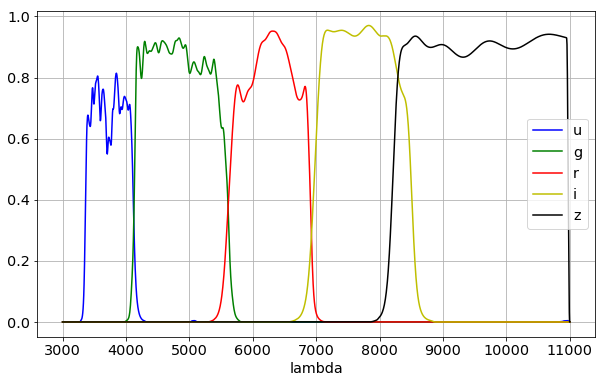

In [146]:
df.plot(color=["b","g","r","y","k"],grid=True)

In [147]:
df.sort_index(axis=0,ascending=True,inplace=True)

# Combine every info in a singl file

In [148]:
dfall=df

In [149]:
dfall["thrpt"]=throughput

In [150]:
dfall["mirror"]=prim_mirror

In [151]:
dfall["qe"]=quantum_eff

In [152]:
dfall["atm"]=atmosphere

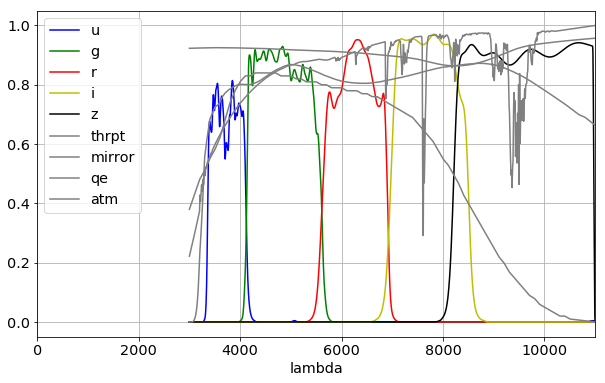

In [153]:
dfall.plot(color=["b","g","r","y","k","grey","grey","grey","grey"],grid=True,xlim=(0,11000))

In [154]:
dfall.sort_index(axis=0,ascending=True,inplace=True)

In [155]:
dfall.to_csv("all_SNLS_transm.csv")

## All multiplications

In [156]:
dftot=dfall

In [157]:
dftot["tot"]=dftot.apply(lambda row : (row["thrpt"]*row["mirror"]*row["qe"]*row["atm"]),axis=1)

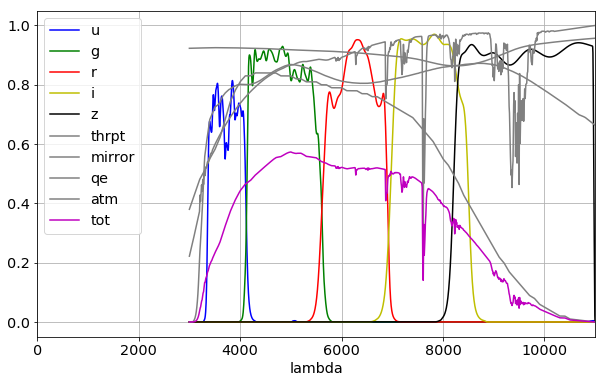

In [158]:
dftot.plot(color=["b","g","r","y","k","grey","grey","grey","grey","m"],grid=True,xlim=(0,11000))

In [159]:
dftot=dftot.loc[:,["u","g","r","i","z","tot"]]

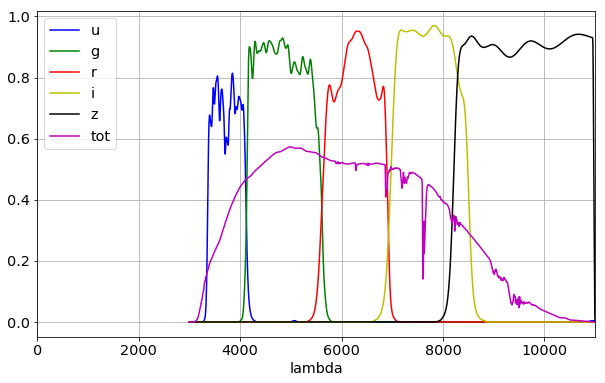

In [160]:
dftot.plot(color=["b","g","r","y","k","m"],grid=True,xlim=(0,11000))

In [161]:
dftot2=pd.DataFrame(index=WL)
dftot2.index.name="lambda"

In [162]:
for char in ["u","g","r","i","z"]:
    dftot2[char]=dftot.apply(lambda row : (row[char]*row["tot"]),axis=1)

In [163]:
dftot2.sort_index(axis=0,ascending=True,inplace=True)

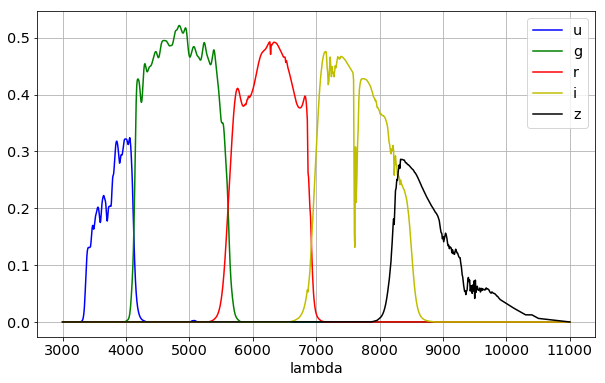

In [164]:
dftot2.plot(color=["b","g","r","y","k"],grid=True)

In [165]:
dftot2.to_csv("tot_SNLS_transm.csv")

# END